In [ ]:
pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/archive (1).zip (Unzipped Files)/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
paths[:5]

[]

In [ ]:
labels[:5]

[]

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label


In [ ]:
df['label'].value_counts()

Series([], Name: label, dtype: int64)

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

IndexError: ignored

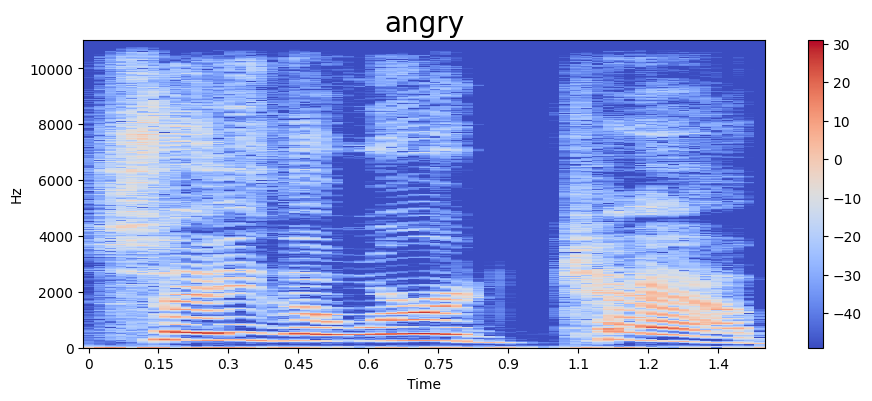

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

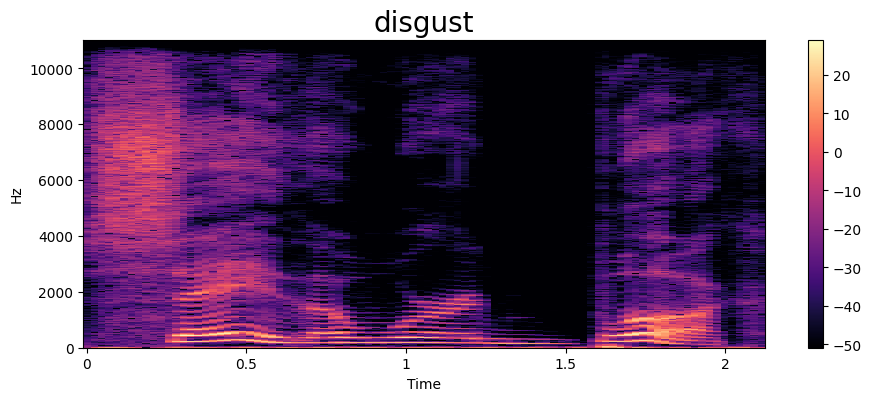

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

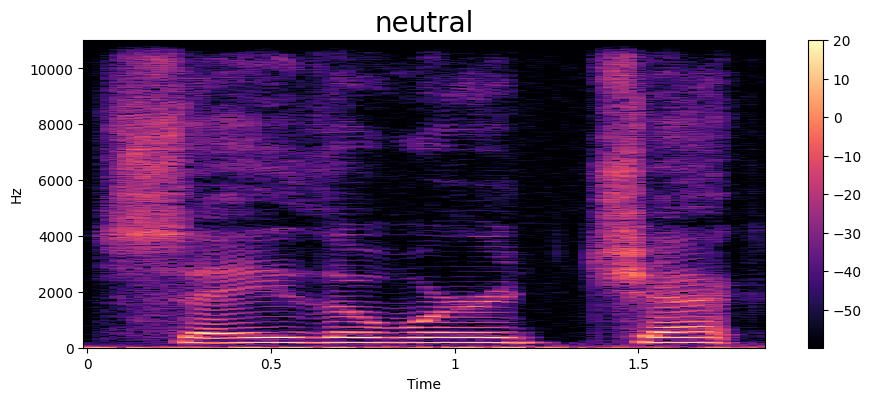

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

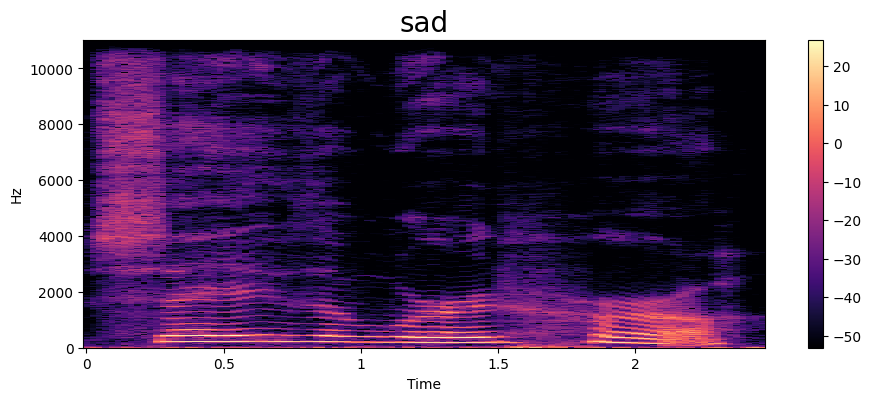

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

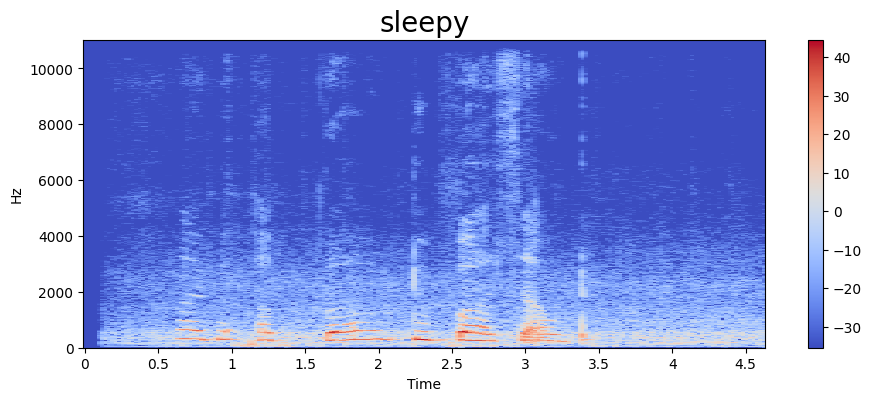

In [ ]:
emotion = 'sleepy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

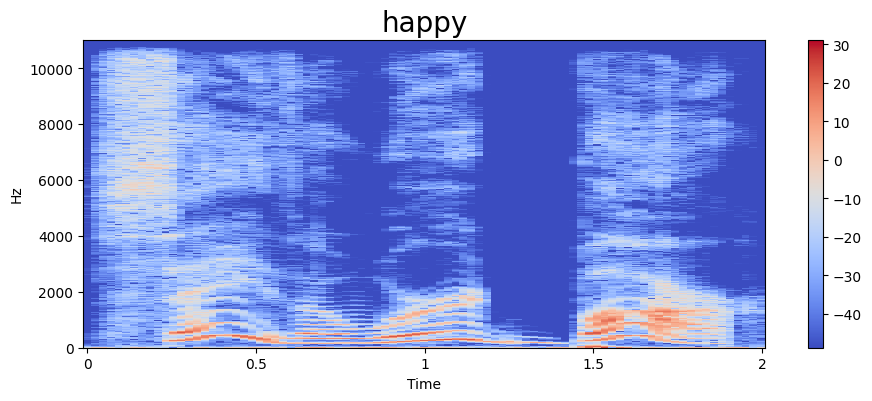

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.0093842e+02,  1.5382539e+02,  5.8439155e+00,  1.3182726e+01,
        5.5306106e+00, -1.6026573e+01, -7.1646109e+00, -1.0121057e+01,
       -1.0767059e+01, -1.0302497e+01, -5.5655799e+00, -3.2216642e+00,
       -3.7332366e+00, -5.6667237e+00, -5.2513738e+00, -5.9438199e-01,
       -4.7531552e+00, -6.2827592e+00, -7.3174925e+00, -4.3288760e+00,
       -2.8196487e+00,  5.2628338e-01,  3.1451008e+00,  6.0282750e+00,
        3.4983997e+00,  4.8318758e+00,  1.9139754e+00,  7.1388799e-01,
       -2.2208574e-01, -5.9516847e-01, -4.5457611e+00, -1.8128749e+00,
       -4.1618171e+00, -6.7190856e-01, -1.0870873e+00,  3.7928480e-01,
       -3.5548830e+00, -1.7332183e-01, -3.3333206e+00, -3.8183033e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-300.93842, 153.8254, 5.8439155, 13.182726, 5...
1       [-305.19998, 157.73068, 1.9225286, 19.738451, ...
2       [-294.16568, 138.48007, -3.233021, 34.638508, ...
3       [-300.39572, 138.32991, 0.49684614, 29.53316, ...
4       [-322.54633, 148.11739, -9.001546, 24.160217, ...
                              ...                        
3322    [-277.49567, 112.339935, -4.485985, 23.061314,...
3323    [-234.16425, 158.43152, 1.6612071, 25.926882, ...
3324    [-195.16162, 141.64444, -16.162542, 35.063705,...
3325    [-181.95364, 118.75212, -8.886754, 43.356228, ...
3326    [-226.75934, 122.83594, 6.7755136, 21.420197, ...
Name: speech, Length: 3327, dtype: object

In [ ]:
X_mfcc.shape

(3327,)

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3327, 40)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(3327, 7)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2495, 40), (2495, 7), (832, 40), (832, 7))

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2495, 40), (2495, 7), (832, 40), (832, 7))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2495, 40, 1), (2495, 7), (832, 40, 1), (832, 7))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 123)               61500     
                                                                 
 dense_3 (Dense)             (None, 64)                7936      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
39/39 [==============================] - 17s 203ms/step - loss: 1.6324 - accuracy: 0.3856 - val_loss: 1.1262 - val_accuracy: 0.4964
Epoch 2/50
39/39 [==============================] - 3s 71ms/step - loss: 1.0437 - accuracy: 0.5832 - val_loss: 0.7669 - val_accuracy: 0.7224
Epoch 3/50
39/39 [==============================] - 4s 114ms/step - loss: 0.7547 - accuracy: 0.7303 - val_loss: 0.6161 - val_accuracy: 0.7897
Epoch 4/50
39/39 [==============================] - 3s 86ms/step - loss: 0.6400 - accuracy: 0.7812 - val_loss: 0.5335 - val_accuracy: 0.8401
Epoch 5/50
39/39 [==============================] - 3s 82ms/step - loss: 0.5441 - accuracy: 0.8176 - val_loss: 0.4591 - val_accuracy: 0.8510
Epoch 6/50
39/39 [==============================] - 3s 77ms/step - loss: 0.4978 - accuracy: 0.8349 - val_loss: 0.3848 - val_accuracy: 0.8642
Epoch 7/50
39/39 [==============================] - 4s 103ms/step - loss: 0.4534 - accuracy: 0.8477 - val_loss: 0.3971 - val_accuracy: 0.8690
Epoch 8/5

In [ ]:
model.save('my_model.h5')
file = drive.CreateFile({'title': 'my_model.h5'})
file.Upload()

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred_test = model.predict(x_test)
y_pred = enc.inverse_transform(pred_test)

y_test = enc.inverse_transform(y_test)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
X, sample_rate = librosa.load('/content/drive/MyDrive/archive (1).zip (Unzipped Files)/TESS Toronto emotional speech set data/Angry/AAF_hall_angry.wav',sr=22050*2)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40),axis=0)
featurelive = mfccs
livedf2 = featurelive